## Exploring data: Exploring continuous data

** This section focus on exploring following features - ScheduledDay, AppointmentDay, Age, AppointmentID **

In [154]:
import pandas as pd
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [155]:
# load the excel file
patient_data = pd.read_csv('../data/KaggleV2-May-2016.csv')
patient_data.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [156]:
cat_feat = ['PatientId', 'AppointmentID', 'Gender', 'Neighbourhood', 'Scholarship', 'Hipertension', 'Diabetes', 
            'Alcoholism', 'Handcap', 'SMS_received']
patient_data.drop(cat_feat, axis=1, inplace=True)

In [157]:
patient_data.head()

,ScheduledDay,AppointmentDay,Age,No-show
0,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,No
1,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,No
2,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,No
3,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,No
4,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,No


In [158]:
# Check if there are any null values
patient_data.isnull().sum()

ScheduledDay      0
AppointmentDay    0
Age               0
No-show           0
dtype: int64

In [159]:
# Check the general distribution of features 
patient_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 4 columns):
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
No-show           110527 non-null object
dtypes: int64(1), object(3)
memory usage: 3.4+ MB


In [160]:
# Check the general distribution of features 
patient_data.describe()

,Age
count,110527.000000
mean,37.088874
std,23.110205
min,-1.000000
25%,18.000000
50%,37.000000
75%,55.000000
max,115.000000


### There is only 1 continuous feature for now - Age 
Scheduled day and appointment day can be ideally be converted to datetime objects. I think that we can determine the day of the week as a feature. If it is a weekday, there are more chance of no show than on a weekend. 

In [161]:
patient_data.groupby('No-show').describe()

Age                                                    
           count       mean        std  min   25%   50%   75%    max
No-show                                                             
No       88208.0  37.790064  23.338878 -1.0  18.0  38.0  56.0  115.0
Yes      22319.0  34.317667  21.965941  0.0  16.0  33.0  51.0  115.0

In [162]:
show = patient_data[patient_data['No-show']=='No']['Age']
no_show = patient_data[patient_data['No-show']=='Yes']['Age']
tvalue, p_val = stats.ttest_ind(show, no_show, equal_var=False)
print('t-statistic: {:.1f}, p-value: {:.3}'.format(tvalue, p_val))

t-statistic: 20.8, p-value: 8.75e-96


In [163]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

c:\users\akhil\envs\udemy_course\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


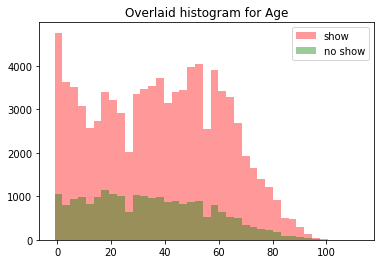

In [164]:
i='Age'
show = list(patient_data[patient_data['No-show'] == 'No'][i])
no_show = list(patient_data[patient_data['No-show'] == 'Yes'][i])
xmin = min(min(show), min(no_show))
xmax = max(max(show), max(no_show))
width = (xmax - xmin) / 40
sns.distplot(show, color='r', kde=False, bins=np.arange(xmin, xmax, width))
sns.distplot(no_show, color='g', kde=False, bins=np.arange(xmin, xmax, width))
plt.legend(['show', 'no show'])
plt.title('Overlaid histogram for {}'.format(i))
plt.show()

### There is a minimum age of -1 and around 6 cases where the age > 100. Could this be outliers? For example, people are giving random numbers for age 

Age doesn't seem to have much effect on whether a person shows up or no. 

In [165]:
# Convert the No-show column from string to numeric (int)
patient_data['No-show'] = patient_data['No-show'].map({'No': 0, 'Yes': 1})

In [166]:
# Convert the dates to datetime object
patient_data['ScheduledDay'] = pd.to_datetime(patient_data['ScheduledDay']).dt.strftime('%Y-%m-%d')
patient_data['ScheduledDay'] = pd.to_datetime(patient_data['ScheduledDay'])
patient_data['AppointmentDay'] = pd.to_datetime(patient_data['AppointmentDay']).dt.strftime('%Y-%m-%d')
patient_data['AppointmentDay'] = pd.to_datetime(patient_data['AppointmentDay'])

In [167]:
t = patient_data['ScheduledDay'].apply(lambda x: x.dayofweek)
t

0         4
1         4
2         4
3         4
4         4
         ..
110522    1
110523    1
110524    2
110525    2
110526    2
Name: ScheduledDay, Length: 110527, dtype: int64

In [168]:
# Determine the day of the week and create a categorical variable - Weekend or not, May be there are more no shows on weekends
patient_data['AppDay_weekend'] = patient_data['AppointmentDay'].apply(lambda x: 1 if x.dayofweek>=5 else 0)

In [169]:
patient_data.groupby('AppDay_weekend').mean()

,Age,No-show
AppDay_weekend,,
0,37.083050,0.201922
1,53.589744,0.230769


There are slightly more no shows on a weekend than on the weekday, which  is opposite to what I expected. 

In [170]:
# Determine the number of days between scheduled day and appointment day. may be more the gap, higher the chance of someone 
# not showing up
patient_data['DayDiff'] = (patient_data['AppointmentDay'] - patient_data['ScheduledDay']).dt.days
patient_data['DayDiff'].unique()

array([  0,   2,   3,   1,   4,   9,  29,  10,  23,  11,  18,  17,  14,
        28,  24,  21,  15,  16,  22,  43,  30,  31,  42,  32,  56,  45,
        46,  39,  37,  38,  44,  50,  60,  52,  53,  65,  67,  91,  66,
        84,  78,  87, 115, 109,  63,  70,  72,  57,  58,  51,  59,  41,
        49,  73,  64,  20,  33,  34,   6,  35,  36,  12,  13,  40,  47,
         8,   5,   7,  25,  26,  48,  27,  19,  61,  55,  62, 176,  54,
        77,  69,  83,  76,  89,  81, 103,  79,  68,  75,  85, 112,  -1,
        80,  86,  98,  94, 142, 155, 162, 169, 104, 133, 125,  96,  88,
        90, 151, 126, 127, 111, 119,  74,  71,  82, 108, 110, 102, 122,
       101, 105,  92,  97,  93, 107,  95,  -6, 139, 132, 179, 117, 146,
       123], dtype=int64)

##  Visualization for categorical data

(0.0, 1.0)

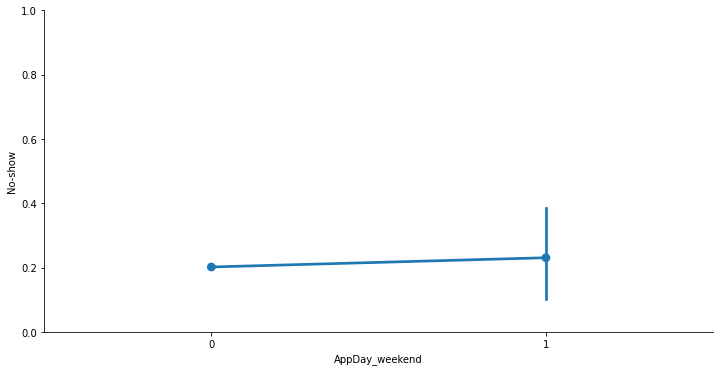

In [179]:
sns.catplot(x='AppDay_weekend', y='No-show', data=patient_data, kind='point', aspect=2)
plt.ylim(0,1)